In [57]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from PIL import Image
print(Image.__file__)
from sklearn.preprocessing import LabelEncoder
import cv2
import numpy as np
from IPython.display import Image, display
from keras.models import load_model


C:\Users\User\Anaconda3\envs\tensorflow1\lib\site-packages\PIL\Image.py


In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

model.add(Conv2D(32, (3, 3), data_format="channels_last"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])




In [22]:
batch_size = 50

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'fruit/Training',  # this is the target directory
        target_size=(100, 100),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'fruit/Test',
        target_size=(100, 100),
        batch_size=batch_size,
        class_mode='categorical')

Found 31943 images belonging to 64 classes.
Found 10734 images belonging to 64 classes.


In [59]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save('first_try.h5')


Epoch 1/50
40/40 [==============================] - 103s 3s/step - loss: 0.0302 - acc: 0.9873 - val_loss: 0.0169 - val_acc: 0.9920
Epoch 2/50
40/40 [==============================] - 49s 1s/step - loss: 0.0304 - acc: 0.9875 - val_loss: 0.0188 - val_acc: 0.9906
Epoch 3/50
40/40 [==============================] - 57s 1s/step - loss: 0.0299 - acc: 0.9876 - val_loss: 0.0220 - val_acc: 0.9908
Epoch 4/50
40/40 [==============================] - 56s 1s/step - loss: 0.0304 - acc: 0.9878 - val_loss: 0.0149 - val_acc: 0.9933
Epoch 5/50
40/40 [==============================] - 53s 1s/step - loss: 0.0302 - acc: 0.9876 - val_loss: 0.0150 - val_acc: 0.9932
Epoch 6/50
40/40 [==============================] - 52s 1s/step - loss: 0.0281 - acc: 0.9884 - val_loss: 0.0153 - val_acc: 0.9928
Epoch 7/50
40/40 [==============================] - 49s 1s/step - loss: 0.0295 - acc: 0.9879 - val_loss: 0.0156 - val_acc: 0.9922
Epoch 8/50
40/40 [==============================] - 50s 1s/step - loss: 0.0297 - acc: 0.9

In [71]:
classes = train_generator.class_indices    
print(classes)

{'Apple Braeburn': 0, 'Apple Golden 1': 1, 'Apple Golden 2': 2, 'Apple Golden 3': 3, 'Apple Granny Smith': 4, 'Apple Red 1': 5, 'Apple Red 2': 6, 'Apple Red 3': 7, 'Apple Red Delicious': 8, 'Apple Red Yellow': 9, 'Apricot': 10, 'Avocado': 11, 'Avocado ripe': 12, 'Banana': 13, 'Banana Red': 14, 'Cactus fruit': 15, 'Cantaloupe 1': 16, 'Cantaloupe 2': 17, 'Carambula': 18, 'Cherry 1': 19, 'Cherry 2': 20, 'Cherry Rainier': 21, 'Clementine': 22, 'Cocos': 23, 'Dates': 24, 'Granadilla': 25, 'Grape Pink': 26, 'Grape White': 27, 'Grape White 2': 28, 'Grapefruit Pink': 29, 'Grapefruit White': 30, 'Guava': 31, 'Huckleberry': 32, 'Kaki': 33, 'Kiwi': 34, 'Kumquats': 35, 'Lemon': 36, 'Lemon Meyer': 37, 'Limes': 38, 'Lychee': 39, 'Mandarine': 40, 'Mango': 41, 'Maracuja': 42, 'Melon Piel de Sapo': 43, 'Mulberry': 44, 'Nectarine': 45, 'Orange': 46, 'Papaya': 47, 'Passion Fruit': 48, 'Peach': 49, 'Peach Flat': 50, 'Pear': 51, 'Pear Abate': 52, 'Pear Monster': 53, 'Pear Williams': 54, 'Pepino': 55, 'Physa

0


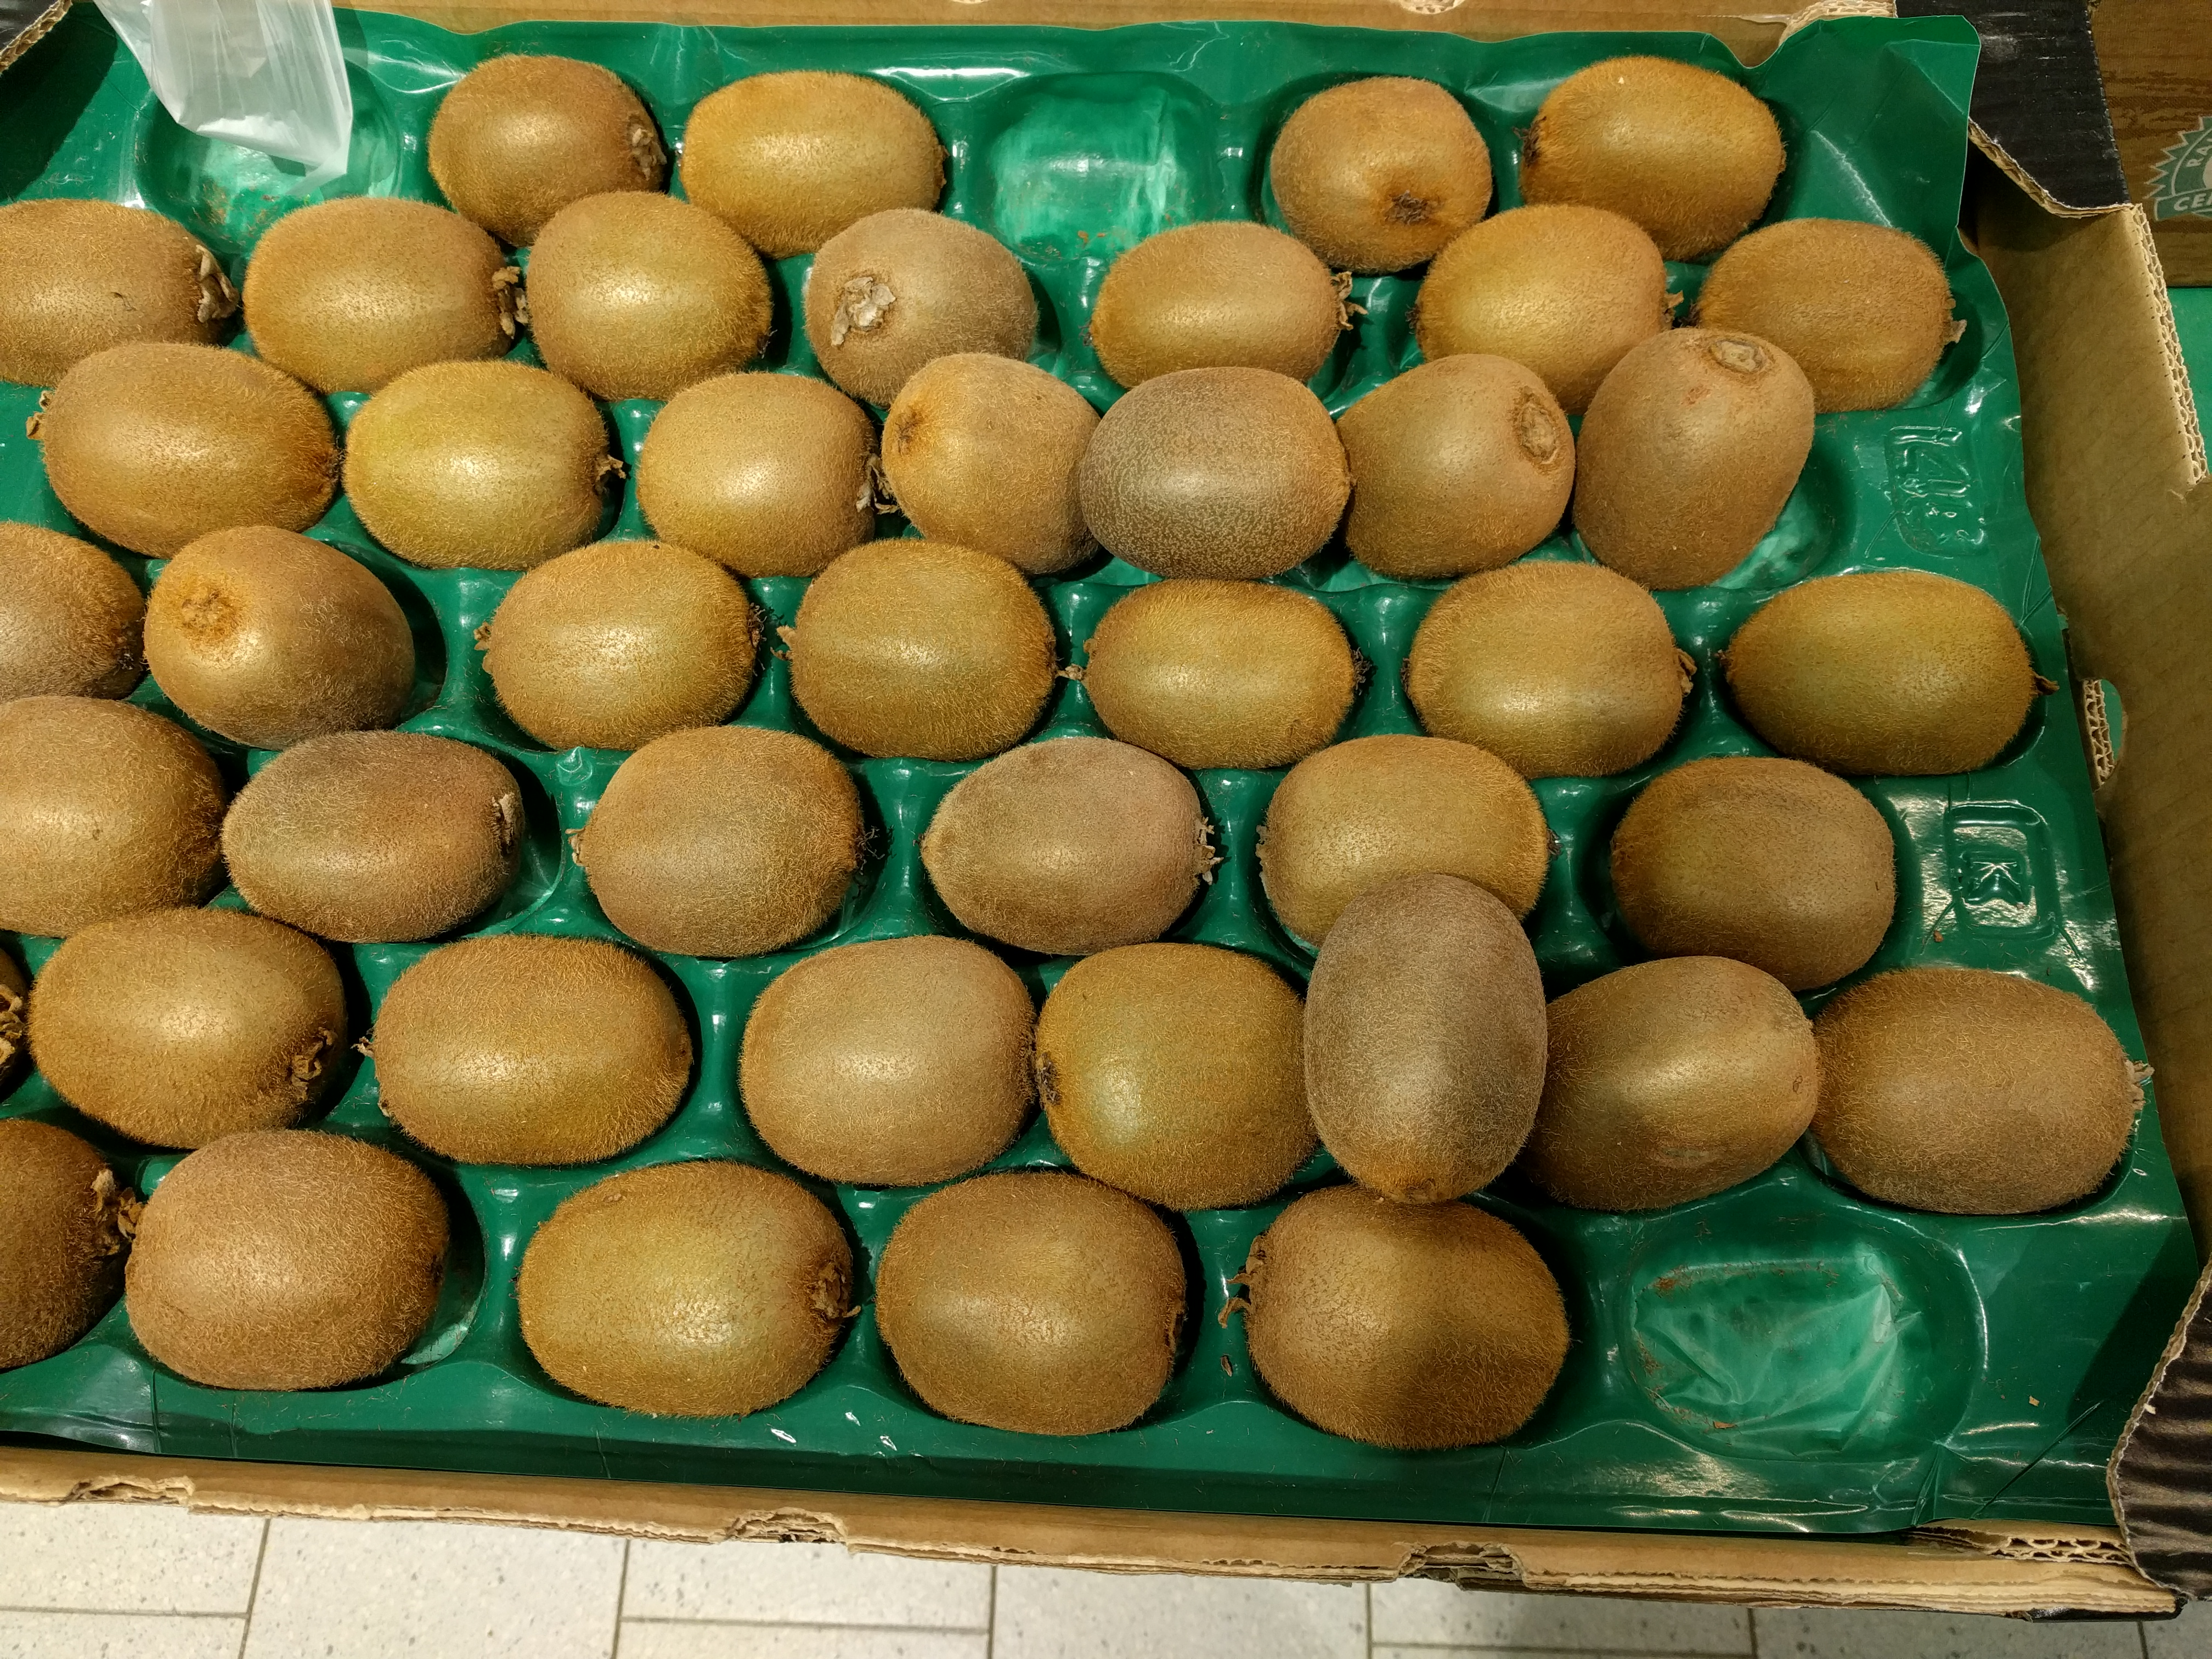

In [75]:
model = load_model('first_try.h5')

img = cv2.imread('test-multiple_fruits/kiwi.jpg')
img = cv2.resize(img,(100,100))
img = np.reshape(img,[1,100,100,3])

classes = model.predict_classes(img)

print(classes[0])
display(Image('test-multiple_fruits/kiwi.jpg'))

[0]


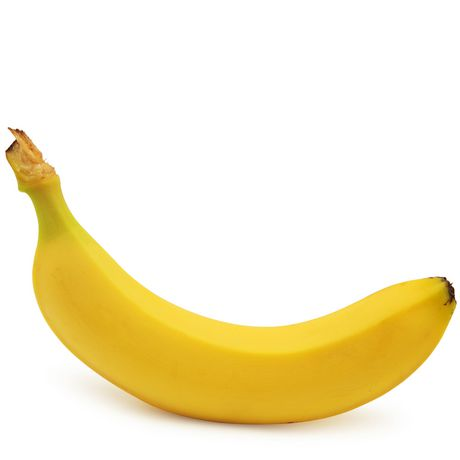

In [73]:
model = load_model('first_try.h5')


img = cv2.imread('test-multiple_fruits/875806_R.jpg')
img = cv2.resize(img,(100,100))
img = np.reshape(img,[1,100,100,3])

classes = model.predict_classes(img)

print(classes[0])
display(Image('test-multiple_fruits/875806_R.jpg'))

[0]


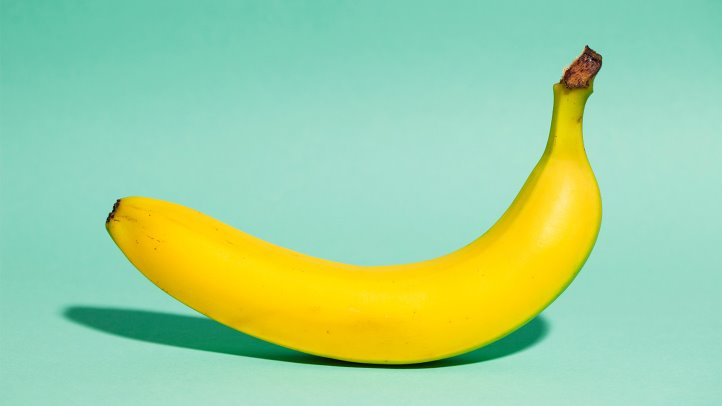

In [74]:
model = load_model('first_try.h5')

img = cv2.imread('test-multiple_fruits/How-Many-Calories-Are-in-a-Banana-1440x810.jpg')
img = cv2.resize(img,(100,100))
img = np.reshape(img,[1,100,100,3])

classes = model.predict_classes(img)

print(classes[0])
display(Image('test-multiple_fruits/How-Many-Calories-Are-in-a-Banana-1440x810.jpg'))

[24]


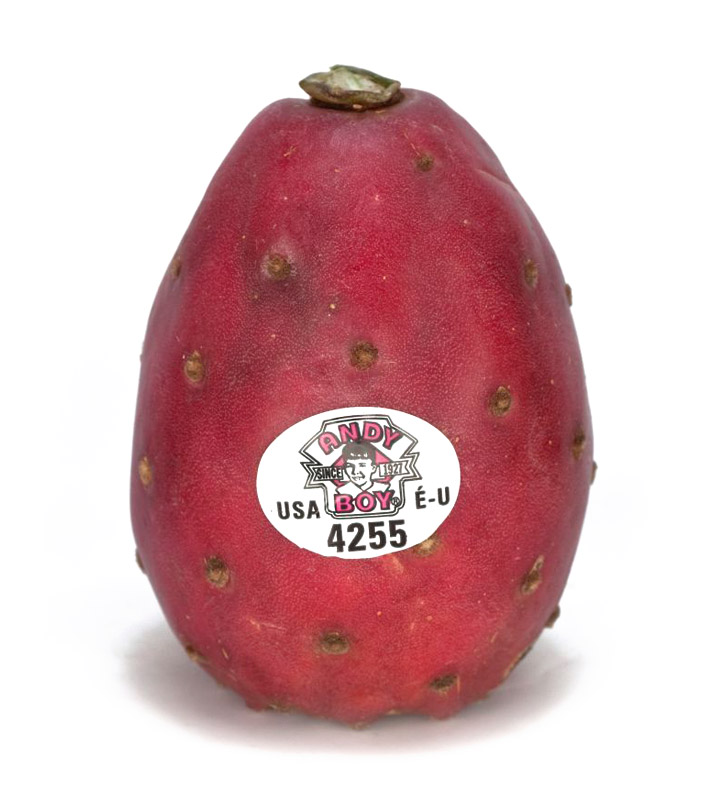

In [69]:
img = cv2.imread('test-multiple_fruits/cp-red-ftr.jpg')
img = cv2.resize(img,(100,100))
img = np.reshape(img,[1,100,100,3])

classes = model.predict_classes(img)

print(classes[0])
display(Image('test-multiple_fruits/cp-red-ftr.jpg'))

32


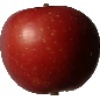

In [77]:
model = load_model('first_try.h5')

img = cv2.imread('fruit/Training/Apple Braeburn/128_100.jpg')
img = cv2.resize(img,(100,100))
img = np.reshape(img,[1,100,100,3])

classes = model.predict_classes(img)

print(classes[0])
display(Image('fruit/Training/Apple Braeburn/128_100.jpg'))